# 建筑物二元分类案例

In [2]:
# !/usr/bin/env python3
# coding=utf-8
"""
example binary
"""
import os
import time

from iobjectspy.ml.vision import Trainer, Inference

## 设置输入数据路径

In [3]:
curr_dir = ''
data_dir = os.path.join(curr_dir, '..','..','example_data')
dom_path = os.path.join(data_dir, 'inference','building_infer.tif')
print(dom_path)

../../example_data/inference/building_infer.tif


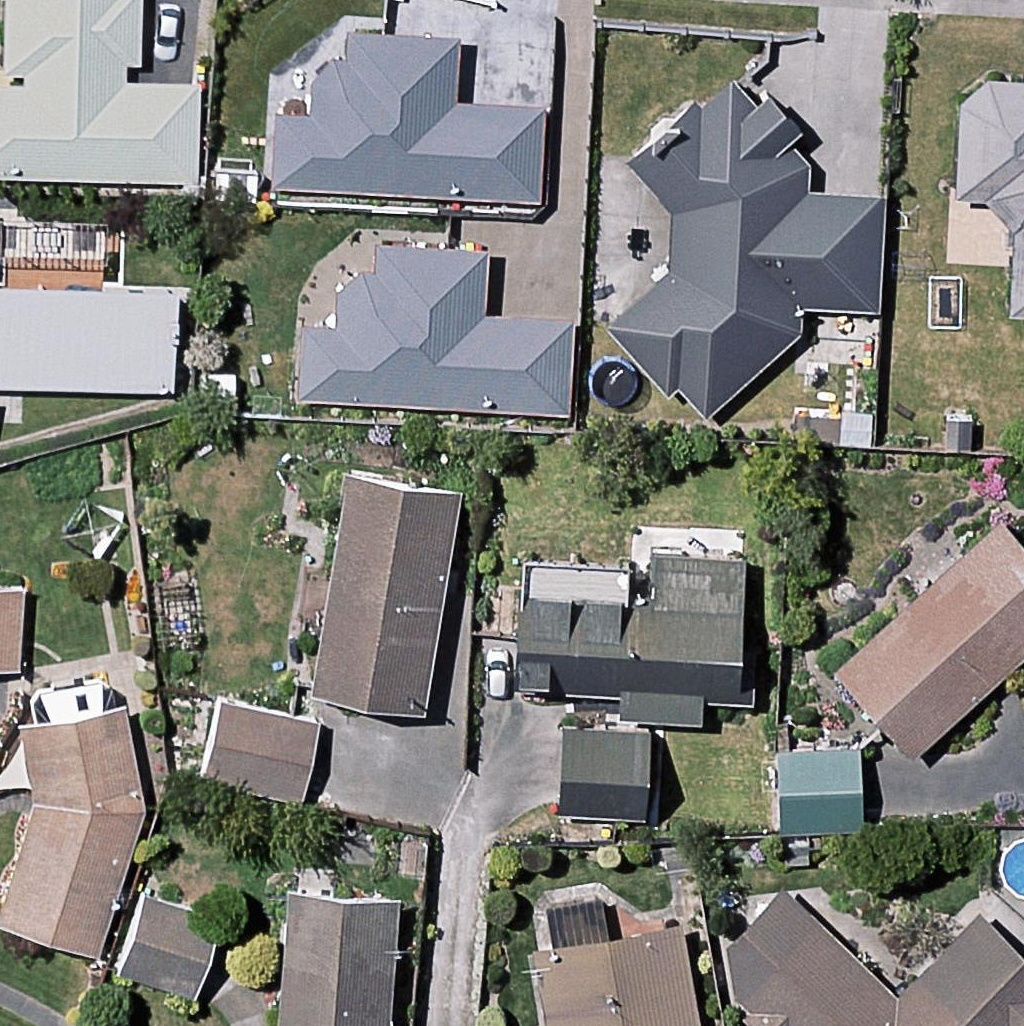

In [4]:
from PIL import Image
img = Image.open(dom_path)
img

## 设置输出数据路径

In [5]:
out_dir = os.path.join(curr_dir, '..','..','out')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [6]:
def example_create_train_data():
    pass

## 二元分类模型训练

In [8]:
"""
train the model
"""

print('train start')

train_data_path = os.path.join(data_dir, 'training', 'binary_cls_train_data', 'train_data')
config = os.path.join(curr_dir, '..','..','trainer_config','binary_cls_train_config.sdt')
output_model_path = out_dir
backbone_weight_path = os.path.join(curr_dir, '..','..','backbone','efficientnet-b3_imagenet_1000_notop.h5')

start_time = time.time()

Trainer(train_data_path=train_data_path, config=config, epoch=1, batch_size=1, lr=0.0001,
        output_model_path=output_model_path,
        output_model_name='example_binary_cls',
        backbone_name='efficientnetb3',
        backbone_weight_path=backbone_weight_path,
        log_path=os.path.join(out_dir, 'experiment_log')
        ).binary_classify_train()

end_time = time.time()
print('完成，共耗时{}s，结果保存在 {}'.format(
    end_time - start_time, os.path.join(output_model_path, 'example_binary_cls')))

train start


RuntimeError: SuperMap_licensefile_7C_featrue_not_found

## 设置模型路径

In [9]:
model_path = os.path.join(out_dir, 'example_binary_cls', 'example_binary_cls.sdm')

## 二元分类模型预测

In [10]:
out_data = os.path.join(out_dir, 'out_building.udb')
out_dataset_name = 'predict_building'
start_time = time.time()
Inference(input_data=dom_path,
          model_path=model_path,
          out_data=out_data,
          out_dataset_name=out_dataset_name).binary_classify_infer(offset=200, result_type='region')

end_time = time.time()
print('提取完成，共耗时{}s，结果数据保存在 {} 数据源下 {} 数据集中'.format(
    end_time - start_time, out_data, out_dataset_name))


RuntimeError: SuperMap_licensefile_7C_featrue_not_found